In [166]:
import yaml
import numpy
import json
import pandas as pd
from urllib.request import urlopen
import scipy.optimize
import random
from collections import defaultdict
from collections import Counter
import nltk
import string
from nltk.stem.porter import *
from sklearn import linear_model
import random
from statistics import mode
from collections import Counter
import gzip
from operator import itemgetter
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
df = pd.read_csv("Hotel_Reviews.csv")

In [108]:
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


In [109]:
# Get country of hotel for all reviews
countries = []

for index, row in df.iterrows():
    address = row['Hotel_Address'].split()
    country = address[-1]
    
    # Encode country with following code: 0 - Netherlands, 1 - UK, 2 - France, 3 - Spain, 4 - Italy, 5 - Austria
    # Handle if country is UK
    if country == 'Netherlands':
        countries.append(0)
    elif country == 'Kingdom':
        countries.append(1)
    elif country == 'France':
        countries.append(2)
    elif country == 'Spain':
        countries.append(3)
    elif country == 'Italy':
        countries.append(4)
    elif country == 'Austria':
        countries.append(5)

# Append country of hotel into dataframe to use as a distinct feature
df['Country'] = pd.Series(countries).values

In [110]:
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,0
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968,0
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968,0
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968,0
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968,0
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968,0


In [111]:
# Build a dataset that contains unique hotels only
dfStripped = df[['Hotel_Address', 'Average_Score', 'Hotel_Name', 'Total_Number_of_Reviews', 'Country']].copy()
dfStripped = dfStripped.drop_duplicates()

# Sort by average score in descending order and print top 10 
dfStripped.sort_values(by=['Average_Score'], ascending=False).head(10)

,Hotel_Address,Average_Score,Hotel_Name,Total_Number_of_Reviews,Country
54717,15 Place Vend me 1st arr 75001 Paris France,9.8,Ritz Paris,122,2
402244,Pau Claris 179 Eixample 08037 Barcelona Spain,9.6,H10 Casa Mimosa 4 Sup,454,3
185602,41 Buckingham Palace Road Westminster Borough ...,9.6,41,244,1
398945,Passeig de Colom 9 Ciutat Vella 08002 Barcelon...,9.6,Hotel The Serras,604,3
176997,4 rue d Alger 1st arr 75001 Paris France,9.6,H tel de La Tamise Esprit de France,166,2
316447,Elisabets 11 Ciutat Vella 08001 Barcelona Spain,9.6,Hotel Casa Camper,732,3
14708,1 Suffolk Place Westminster Borough London SW1...,9.6,Haymarket Hotel,255,1
390999,One Ham Yard Westminster Borough London W1D 7D...,9.5,Ham Yard Hotel,314,1
312809,Dels Lledo 7 Ciutat Vella 08003 Barcelona Spain,9.5,Mercer Hotel Barcelona,362,3
81101,19 Boulevard De La Tour Maubourg 7th arr 75007...,9.5,Le Narcisse Blanc Spa,222,2


In [112]:
# Find which country has the most distinct hotels
# Find average rating by country

countryHotelDict = dict() # Used to count distinct hotels
countryScoreDict = dict() # Used to count distinct scores

for index, row in dfStripped.iterrows():
    score = row['Average_Score']
    hotel = row['Hotel_Name']
    country = row['Country']
    if country not in countryHotelDict:
        countryHotelDict[country] = [hotel]
        countryScoreDict[country] = [score]
    elif hotel not in countryHotelDict[country]:
        countryHotelDict[country].append(hotel)
        countryScoreDict[country].append(score)
        
countryHotelCount = dict() # Associate entire country with num of hotels
countryScoreCount = dict() # Associate entire country with average score

for key, value in countryScoreDict.items():
    countryScoreCount[key] = sum(value)/len(value)

for key, value in countryHotelDict.items():
    countryHotelCount[key] = len(value)

In [113]:
print(countryHotelCount)
print(countryScoreCount)

{0: 105, 1: 400, 2: 458, 3: 211, 4: 162, 5: 158}
{0: 8.409523809523808, 1: 8.464000000000004, 2: 8.493668122270746, 3: 8.496208530805688, 4: 8.318518518518518, 5: 8.549999999999995}


Even though Austria has one of the fewest number of distinct hotels, it has the highest average rating of all hotels. Interesting because Austria does not show up in the top 10 hotels. 

### Relationship between number of reviews a reviewer gives and their average rating

In [114]:
# Find average rating based on number of reviews by user
numReviewsRatingDict = dict()

for index, row in df.iterrows():
    numReviews = row['Total_Number_of_Reviews_Reviewer_Has_Given']
    rating = row['Reviewer_Score']
    if numReviews not in numReviewsRatingDict:
        numReviewsRatingDict[numReviews] = [rating]
    else:
        numReviewsRatingDict[numReviews].append(rating)

In [115]:
# Associate number of reviews with the average rating for that number

numReviewsAvgRatingDict = dict()

for key,value in numReviewsRatingDict.items():
    numReviewsAvgRatingDict[key] = sum(value)/len(value)

Text(0,0.5,'Average Rating')

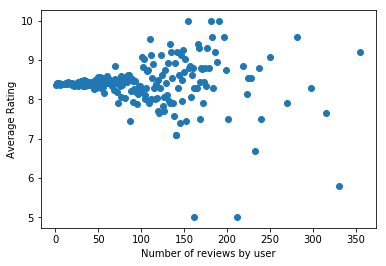

In [116]:
# Generate scatter plot to visualize the data 
X = []
y = []

for key, value in numReviewsAvgRatingDict.items():
    X.append(key)
    y.append(value)
    
plt.scatter(X, y)
plt.xlabel('Number of reviews by user')
plt.ylabel('Average Rating')

The fewer reviews a user gives, the closer the average is to 8.5

### Relationship between month of year and rating

In [117]:
#map of all months and a list of all their ratings
months_ratings = defaultdict(list)

for date, rating in zip(df['Review_Date'], df['Reviewer_Score']):
    month = date.split("/")[0]
    months_ratings[month].append(rating)
    
for month in range(1,13):
    print(month, sum(months_ratings[str(month)])/len(months_ratings[str(month)]))

1 8.48501103177
2 8.52805837894
3 8.47983215763
4 8.43152997691
5 8.3810410841
6 8.3914187803
7 8.33548602944
8 8.41173823808
9 8.29064768549
10 8.26157653445
11 8.33884348068
12 8.42713156765


In [118]:
# Append month of review to dataframe
months = []

for date in df['Review_Date']:
    month = date.split("/")[0]
    months.append(month)

df['Month'] = pd.Series(months).values

The month with the highest rating is February. As a general trend it seems that the winter months tend to have higher rating on average than the spring and summer months. Possibly people are more thankful to have shelter when its cold? Or perhaps people are more critical during the summer

### Relationship between trip type and rating

In [119]:
trip_type_ratings = defaultdict(list)

for tags, rating in zip(df['Tags'], df['Reviewer_Score']):
    L = ' Leisure trip '
    B = ' Business trip '
    if L in tags:
        trip_type_ratings[L].append(rating)
    elif B in tags:
        trip_type_ratings[B].append(rating)
    else:
        continue
        
leisure_ratings = trip_type_ratings[' Leisure trip ']
business_ratings = trip_type_ratings[' Business trip ']

leisure_avg = sum(leisure_ratings)/len(leisure_ratings)
business_avg = sum(business_ratings)/len(business_ratings)

print("Leisure Trip's average ratings:", leisure_avg)
print("Business Trip's average ratings:", business_avg)

Leisure Trip's average ratings: 8.48829593708
Business Trip's average ratings: 7.97273056101


In [120]:
print(len(leisure_ratings) + len(business_ratings))
print(len(df))

500717
515738


In [121]:
# Make an encoding for trip type encoded as 0: Leisure, 1: Business, 2: Neither
tripType = []

for tags in df['Tags']:
    if ' Leisure trip ' in tags:
        tripType.append(0)
    elif ' Business trip ' in tags:
        tripType.append(1)
    else:
        tripType.append(2)
        
df['Trip Type'] = pd.Series(tripType).values

It seems that people on leisurely trips tend to rate 1/2 a point higher than those on Busieness.

In [122]:
### Relationship between length of stay and rating

import matplotlib
import matplotlib.pyplot as plt
# Create random data with numpy
import numpy as np
import re

stays = []

#retrieve length of stay
for index,row in df.iterrows():
   
    tags = row['Tags'].split(',')
    found = False
    for i in tags:
        
        if "Stayed" in i:
            num_stayed = ''.join(x for x in i if x.isdigit())
            stays.append(num_stayed)
            found= True
    if not found:
        stays.append(str(-1))

In [123]:
reviewer_score = []
for index,row in df.iterrows():
    score = row['Reviewer_Score']

    reviewer_score.append(score)

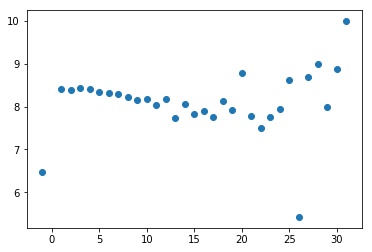

In [124]:
d = {}
for i in stays:
    if i not in d:
        d[i] = 1
    else:
        d[i] = d[i] + 1
pairs = []
for i in range(len(stays)):
    pairs.append((int(stays[i]), reviewer_score[i]))

#dictionary of stays and reviewer_score
d = defaultdict(list)
for i in pairs:
    d[i[0]].append(i[1])
    
#dictionary of stays and average reviewer_score
average = {}
for i in d:
    l = d[i]
    s = 0
    for val in l:
        s = s + val
    average[i] = s/len(l)

list_of_average = []
list_of_stays = []
for i in average:
    list_of_average.append(average[i])
    list_of_stays.append(i)
    
plt.scatter(list_of_stays, list_of_average)
plt.show()

The longer a stay, the lower the review score, but after 22 days roughly, it begins to increase

In [125]:
df['Duration of Stay'] = pd.Series(stays).values

In [126]:
list(df)

['Hotel_Address',
 'Additional_Number_of_Scoring',
 'Review_Date',
 'Average_Score',
 'Hotel_Name',
 'Reviewer_Nationality',
 'Negative_Review',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Positive_Review',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'Tags',
 'days_since_review',
 'lat',
 'lng',
 'Country',
 'Month',
 'Trip Type',
 'Duration of Stay']

In [188]:
training, test = train_test_split(df, test_size=0.3)

In [195]:
def feature(datum):
    feat = [1, datum['Country'], datum['Trip Type'], datum['Duration of Stay'], datum['Average_Score'], datum['Total_Number_of_Reviews']]
    return feat

In [196]:
X_train = [feature(row) for index, row in training.iterrows()]
y_train = [row['Reviewer_Score'] for index,row in training.iterrows()]

In [197]:
theta, residuals, rank, s = numpy.linalg.lstsq(X_train, y_train)
theta

array([ -4.21635346e-01,  -9.25331769e-03,  -2.65791363e-01,
        -2.16535132e-02,   1.06693772e+00,  -6.87775734e-06])

In [198]:
predictions_train = []

for index, row in training.iterrows():
    predictions_train.append(theta[0] + theta[1] * float(row['Country']) + 
                             theta[2] * float(row['Trip Type']) + theta[3] * float(row['Duration of Stay']) + 
                             theta[4] * float(row['Average_Score']) + theta[5] * float(row['Total_Number_of_Reviews']))
    
# Evaluate accuracy of model
trainMSE = mean_squared_error(y_train, predictions_train)
print("MSE:", trainMSE)
r2 = r2_score(y_train, predictions_train)
print("R-Squared:", r2)

MSE: 2.31244247458
R-Squared: 0.138861049939


In [175]:
predictions_train

[9.2543325892944406,
 8.6010411622069149,
 8.9696271322294141,
 8.7759970773902936,
 8.3866668694785638,
 9.3069656941888024,
 8.5178387094887356,
 8.3242086546496168,
 8.9070873906712489,
 8.2776133465940145,
 8.8739329378330858,
 8.4038268077814564,
 9.0270870081845835,
 7.4600771533873749,
 8.2338584776061339,
 8.2059896297501673,
 7.9179056124779992,
 8.7382507990558498,
 8.3060225551005917,
 8.4292399188738152,
 7.9340739343374267,
 8.7328859068556213,
 8.4274593262599282,
 8.3431992665991022,
 7.8404768048487288,
 7.6999678950106869,
 8.9544056843980897,
 7.3094266613210017,
 9.0351315255052818,
 8.1280204614702907,
 8.3334956434447811,
 8.0464901079626401,
 8.8214824579593554,
 7.7478579950846473,
 9.2029920369072507,
 8.1930368146394432,
 8.7941831769393204,
 8.6901279929285504,
 8.1173908391352469,
 9.1988882515176833,
 7.7838214412940188,
 8.4329457052404173,
 9.0670749525654895,
 8.7144334160455568,
 9.0859840377857566,
 8.5261996991031772,
 8.0353201249769874,
 7.9338500459